In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

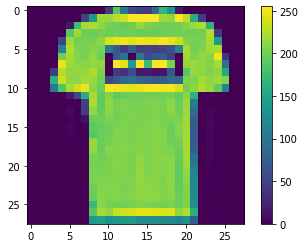

In [4]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),# 28x28 lik imagei düzleştiriyor ki modeli beslesin 
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10,activation='softmax')# tüm outputlatın toplamı 1 ediyor ona göre en yüksek olan biizm sonuc
])

In [7]:
#Hyperparameter tuning
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=1,batch_size=128)

469/469 [==============================] - 3s 5ms/step - loss: 0.5550 - accuracy: 0.8101


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4782 - accuracy: 0.8353
Test acc:  0.8353000283241272


In [13]:
pred = model.predict(test_images)
print(class_names[np.argmax(pred[1])])

Pullover


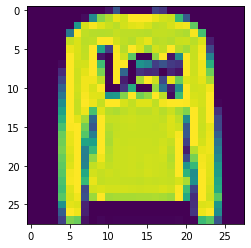

In [14]:
plt.imshow(test_images[1])
plt.show()